In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
import scipy.stats as st 
from statistics import 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
""" Load the CSV data into a Pandas DataFrame """
df = pd.read_csv("insurance.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
""" Display the first few rows, column names, data types, and shape of the DataFrame."""
rows = df.head(5)
print("Few rows:", rows)
print()

col_names = df.columns
print("Column names:\n", col_names)
print()

data_type = df.dtypes
print("datatype of dataset:\n", data_type)
print()

data_shape = df.shape
print("Shape of dataset:", data_shape)

Few rows:    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Column names:
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

datatype of dataset:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Shape of dataset: (1338, 7)


In [5]:
""" Check if there are any missing values in each column."""
count_missing_value = pd.isnull(df).count()
print("Count Missing value of dataset:\n", count_missing_value)
print()
missing_value = pd.isnull(df).sum()
print("Missing value of dataset:\n", missing_value)

Count Missing value of dataset:
 age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

Missing value of dataset:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
""" Calculate the mean, median, and standard deviation for numeric columns (age, bmi, children, charges)."""
stat_info = df[["age", "bmi", "children", "charges"]].agg(["mean", "median", "std"])
print("Mean, median and std of dataset:\n", stat_info)

Mean, median and std of dataset:
               age        bmi  children       charges
mean    39.207025  30.663397  1.094918  13270.422265
median  39.000000  30.400000  1.000000   9382.033000
std     14.049960   6.098187  1.205493  12110.011237


In [8]:
""" Ensure data types are appropriate, and convert if necessary (e.g., children should be integer)."""
type_conversion = df["children"].astype(int)
print("Children int datatype conversion:", type_conversion)

Children int datatype conversion: 0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64


In [9]:
""" Count the occurrences of unique values in the sex, smoker, and region columns."""
unique_value = df[["sex", "smoker", "region"]].nunique()
print("Unique values count:\n", unique_value)

Unique values count:
 sex       2
smoker    2
region    4
dtype: int64


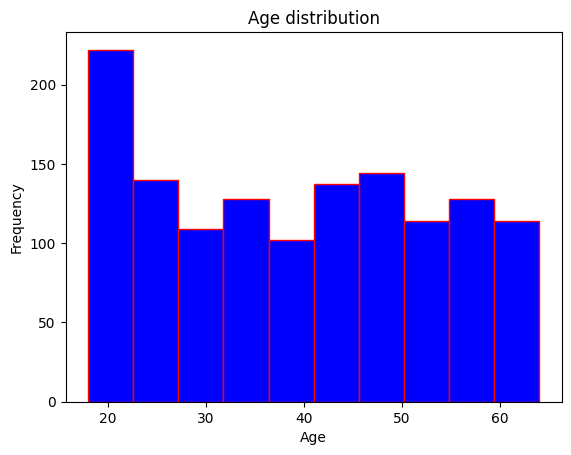

In [10]:
""" Create a histogram to show the age distribution using matplotlib."""
plt.hist(data=df, x="age", color="b", edgecolor="r", bins=10)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [11]:
""" Calculate the average charges for each gender."""
avg_charges = df.groupby("sex")["charges"].mean()
print("Average charges of each group:\n", avg_charges)

Average charges of each group:
 sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [12]:
""" Calculate the average charges for smokers vs. non-smokers."""
avg_charges = df.groupby("smoker")["charges"].mean()
print("average charges for smokers vs. non-smokers:\n", avg_charges)

average charges for smokers vs. non-smokers:
 smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [13]:
""" Find and display unique values in the region column."""
unique_value = df["region"].unique()
print("Unique values in the region:", unique_value)

Unique values in the region: ['southwest' 'southeast' 'northwest' 'northeast']


In [14]:
""" Compute the correlation matrix for numeric columns using numpy or pandas."""
numeric_col = df[["age", "bmi", "children", "charges"]]
corr = numeric_col.corr()
print("correlation matrix:\n", corr)

correlation matrix:
                age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


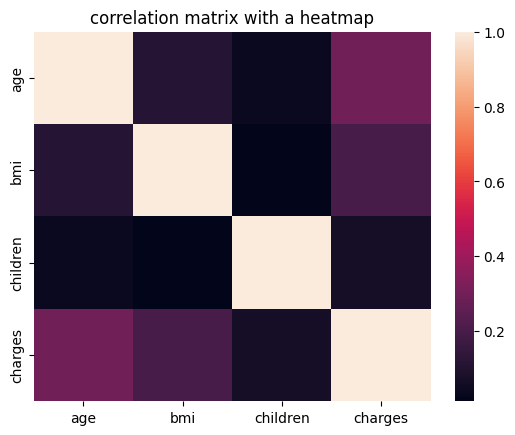

In [15]:
""" Visualize the correlation matrix with a heatmap using seaborn."""
numeric_col = df[["age", "bmi", "children", "charges"]]
corr = numeric_col.corr()
sns.heatmap(corr)
plt.title("correlation matrix with a heatmap")
plt.show()

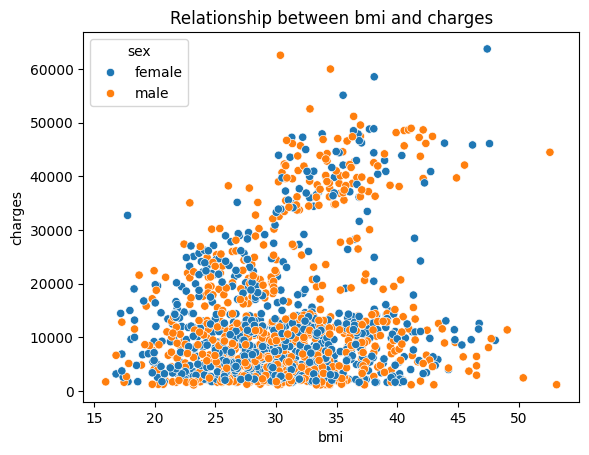

In [16]:
""" Create a scatter plot to visualize the relationship between bmi and charges."""
sns.scatterplot(data=df, x="bmi", y="charges", hue="sex")
plt.title("Relationship between bmi and charges")
plt.show()

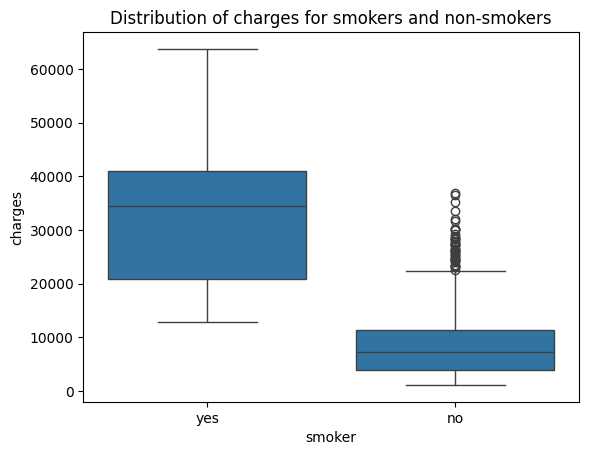

In [17]:
""" Use a box plot to visualize the distribution of charges for smokers and non-smokers."""
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Distribution of charges for smokers and non-smokers")
plt.show()

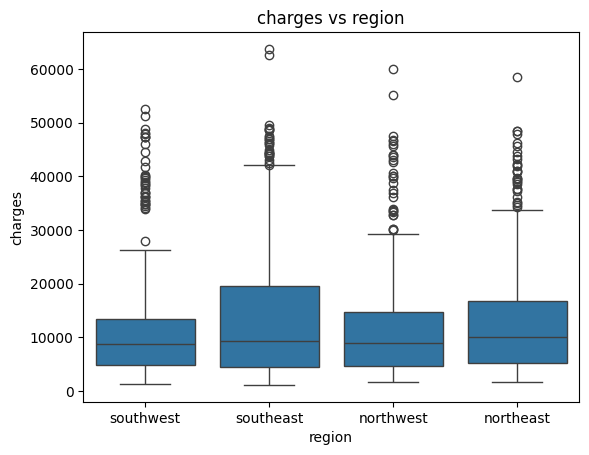

In [18]:
""" Create a box plot of charges by region using seaborn."""
sns.boxplot(data=df, x="region", y="charges")
plt.title("charges vs region")
plt.show()

In [20]:
""" Group the data by region and smoker, calculating the mean charges for each group."""
group = df.groupby(["region", "smoker"])["charges"].mean()
print("mean charges for each group:\n", group)

mean charges for each group:
 region     smoker
northeast  no         9165.531672
           yes       29673.536473
northwest  no         8556.463715
           yes       30192.003182
southeast  no         8032.216309
           yes       34844.996824
southwest  no         8019.284513
           yes       32269.063494
Name: charges, dtype: float64


In [22]:
""" Calculate the count of smokers and non-smokers by gender."""
count_smoker = df["sex"].value_counts("smoker")
print("count of smokers:\n", count_smoker)

count of smokers:
 sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64


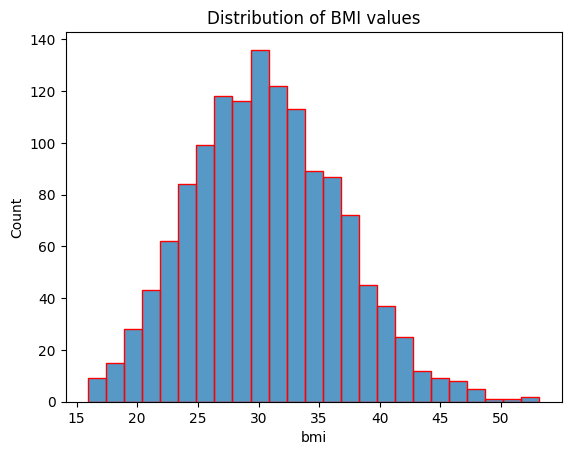

In [23]:
""" Create a histogram to show the distribution of BMI values."""
sns.histplot(data=df, x="bmi", edgecolor="r")
plt.title("Distribution of BMI values")
plt.show()

In [24]:
""" Apply one-hot encoding to categorical columns (sex, smoker, and region)."""
encode = pd.get_dummies(df, columns= ["sex", "smoker", "region"])
print("one-hot encoding:", encode)

one-hot encoding:       age     bmi  children      charges  ...  region_northeast  region_northwest  region_southeast  region_southwest
0      19  27.900         0  16884.92400  ...             False             False             False              True
1      18  33.770         1   1725.55230  ...             False             False              True             False
2      28  33.000         3   4449.46200  ...             False             False              True             False
3      33  22.705         0  21984.47061  ...             False              True             False             False
4      32  28.880         0   3866.85520  ...             False              True             False             False
...   ...     ...       ...          ...  ...               ...               ...               ...               ...
1333   50  30.970         3  10600.54830  ...             False              True             False             False
1334   18  31.920         0   2205.980

In [27]:
""" Normalize the age, bmi, and charges columns to a scale of 0-1."""
data = df[["age", "bmi", "charges"]]

# Method : 1
normalize = preprocessing.normalize(data)
print("Normalization:\n", normalize[:3])
print()

# Method : 2
min_max_scaler = MinMaxScaler()
normalize_ = min_max_scaler.fit_transform(data)
print("Normalization:\n", normalize_[:3])

Normalization:
 [[0.00112526 0.00165236 0.999998  ]
 [0.01042888 0.01956573 0.99975418]
 [0.0062926  0.00741628 0.9999527 ]]

Normalization:
 [[0.02173913 0.3212268  0.25161076]
 [0.         0.47914985 0.00963595]
 [0.2173913  0.45843422 0.05311516]]


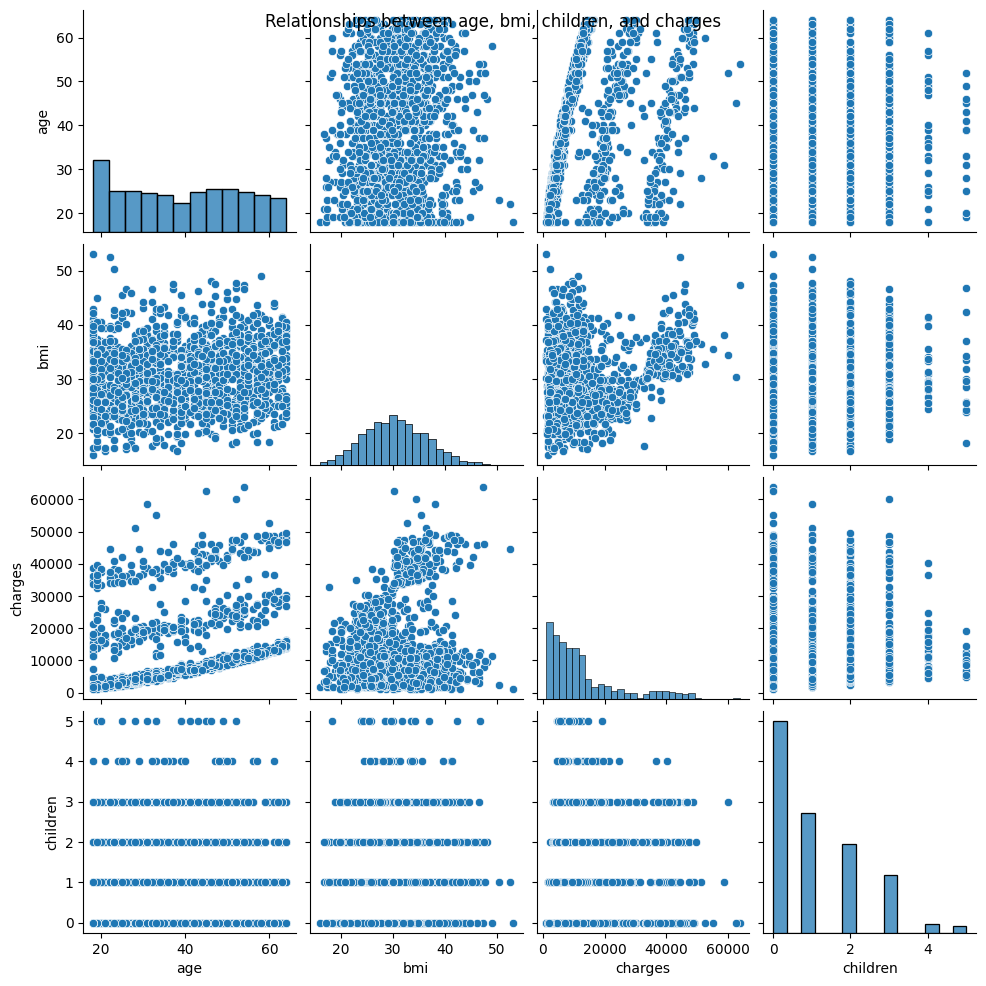

In [31]:
""" Use seaborn's pairplot to visualize relationships between age, bmi, children, and charges."""
data = df[["age", "bmi", "charges", "children"]]
sns.pairplot(data=data).fig.suptitle("Relationships between age, bmi, children, and charges")
plt.show()

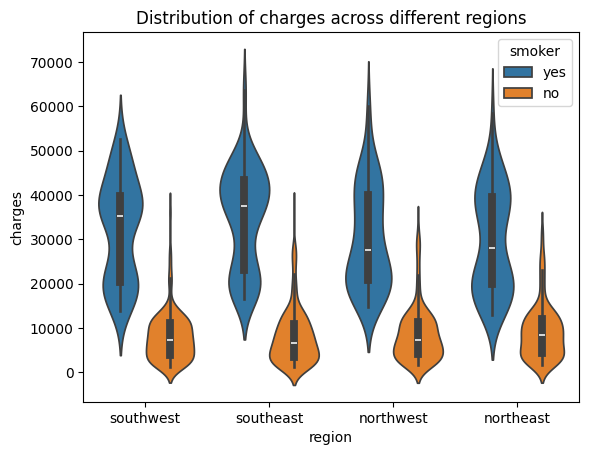

In [32]:
""" Create a violin plot to visualize the distribution of charges across different regions, separated by smoker status."""
sns.violinplot(data=df, x="region", y="charges", hue="smoker")
plt.title("Distribution of charges across different regions")
plt.show()

In [38]:
""" Perform linear regression to predict charges based on age, bmi, children, and smoker status."""
pd.set_option("future.no_silent_downcasting", True)
df["smoker"] = df["smoker"].replace({"yes": 0, "no": 1})

x = df[["age", "bmi", "children", "smoker"]]
y = df["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)

y_prediction = model.predict(x_test)
print("y - prediction:\n", y_prediction)
print()
print("y test:\n", y_test)
print()

mse = mean_squared_error(y_test, y_prediction)
print("mean squared error:", mse)

y - prediction:
 [30925.5254814   5888.30466235  9567.11019611  3908.31116167
  8701.10911002 29703.25746043 10814.30675749 12616.93450715
  9324.97226203  3858.51068248 12411.74538047  1608.23352659
 40705.43155959 26568.56050832  7981.95402281 26376.18713512
  2354.25570753  8811.49300355  8522.22141612  8554.69502765
 11645.25454892 10927.17425307  3705.64511649 13868.96808932
  2739.04549454  2623.48699974 11492.18158576 12988.04652375
  3390.50757393  9738.44925774 10862.56642658 23402.84005094
 12216.75640582  4170.13112719 10964.93203692  5836.1148461
  9932.69290878 13390.31404502 30717.73962048 34660.39975418
  9574.50265558  7324.75168119 15998.9439946   5416.89758815
 11977.19459373  7664.72349917 13938.86008813 11001.35466282
 25698.53501009  5283.29569812 26454.88578133 11735.43379064
 15998.07841652  6285.60497953  9445.49439979 26169.66103438
  7957.34426673 39875.83423219  7751.87409014 31937.56177382
  5721.06366559 16034.21999251 39308.60548016 28606.85765734
 14436.5

In [39]:
""" Calculate and interpret the confidence intervals for the average charges in each region."""
south_west_region = df[df["region"] == "southwest"]["charges"]
sw_confidence_interval = st.t.interval(confidence=0.95, df=len(south_west_region)-1, loc=np.mean(south_west_region),
                                       scale=st.sem(south_west_region))
print("South West region confidence interval:", sw_confidence_interval)

south_east_region = df[df["region"] == "southeast"]["charges"]
se_confidence_interval = st.t.interval(confidence=0.95, df=len(south_east_region)-1, loc=np.mean(south_east_region),
                                        scale=st.sem(south_east_region))
print("South East region confidence interval:", se_confidence_interval)

north_west_region = df[df["region"] == "northwest"]["charges"]
nw_confidence_interval = st.t.interval(confidence=0.95, df=len(north_west_region)-1, loc=np.mean(north_west_region),
                                       scale=st.sem(north_west_region))
print("North West region confidence interval:", nw_confidence_interval)

north_east_region = df[df["region"] == "northeast"]["charges"]
ne_confidence_interval = st.t.interval(confidence=0.95, df=len(north_east_region)-1, loc=np.mean(north_east_region),
                                       scale=st.sem(north_east_region))
print("North East region confidence interval:", ne_confidence_interval)

South West region confidence interval: (np.float64(11085.73850296538), np.float64(13608.136251619237))
South East region confidence interval: (np.float64(13295.35877461746), np.float64(16175.464100602316))
North West region confidence interval: (np.float64(11209.292359959769), np.float64(13625.858387978691))
North East region confidence interval: (np.float64(12176.165507496347), np.float64(14636.60352527526))


In [42]:
""" Conduct a t-test to see if there is a significant difference in average charges between smokers and non-smokers."""
smoker = df[df[["smoker"]] == "yes"]["charges"]
non_smoker = df[df["smoker"] == "no"]["charges"]
print(smoker)
# t_stat, p_value = st.ttest_ind(smoker, non_smoker)

# print("T- static value:", t_stat)
# print("P value:", p_value)

# significant level
# alpha = 0.05

# if p_value<alpha:
#    print("Reject the null hypothesis. there is a significant difference between sample mean and hypothesized population mean.")
#else:
#    print("Accept the hypothesis. there is not a significant difference between sample mean and hypothesized population mean.")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1333   NaN
1334   NaN
1335   NaN
1336   NaN
1337   NaN
Name: charges, Length: 1338, dtype: float64
